<a href="https://colab.research.google.com/github/emilianoacebal/Aprendizaje-de-Maquina/blob/master/Desigualdad_de_genero_en_el_ambito_laboral_argentino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desigualdad de género en el ámbito laboral argentino**

El objetivo de este proyecto es describir las disparidades entre géneros expresados en la ultima Encuesta Nacional a trabajadores sobre Condiciones de Empleo, Trabajo, Salud y Seguridad (ECETSS 2018).

Cada registro del dataset expresa una encuesta tomada en la casa de cada uno de los 8966 trabajadores. Información complementaria: [link](https://www.argentina.gob.ar/srt/observatorio-srt/encuestas-salud-trabajo/ECETSS-2018)

Los resultados de la encuesta se encuentran en el archivo .[CSV](https://github.com/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/trabajadores/ecetss_ocupados.csv) y la  guia de valores y atributos se encuentra en el archivo .[XLSX](https://github.com/manlio99/Materia-de-aprendizaje/blob/master/3_MidtermProjects/trabajadores/ECETSS_Dise%C3%B1o_registro.xlsx)

In [1]:
import pandas as pd
import numpy as np
dataroot = "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/3_MidtermProjects/trabajadores/ecetss_ocupados.csv"
df = pd.read_csv(dataroot)
df.head

<bound method NDFrame.head of          codmuestra  hogar  region  ...  edad_0a5  edad_6a11  edad_12a17
0     002-0001-0009      1      10  ...         1          1           1
1     002-0001-0012      1      10  ...         1          1           1
2     002-0001-0013      1      10  ...         1          2           1
3     002-0001-0015      1      10  ...         1          1           1
4     002-0001-0017      1      10  ...         1          1           1
...             ...    ...     ...  ...       ...        ...         ...
8961  584-0090-0157      1      44  ...         1          1           1
8962  584-0090-0248      1      44  ...         1          1           2
8963  584-0090-0278      1      44  ...         1          1           1
8964  584-0090-0309      1      44  ...         1          1           1
8965  584-0090-0339      1      44  ...         1          1           1

[8966 rows x 373 columns]>

In [2]:
import warnings
warnings.filterwarnings("ignore")

Como vemos contamos con más de 350 atributos. Mi idea es ir tomando atributos aislados para analizar distintos casos de desigualdad. 

## **Ingresos último mes**

Comenzaremos analizando el atributo "ingreso_op" que corresponde al ingreso en bolsillo del mes anterior a realizar la encuesta.

In [3]:
df['ingreso_op'].describe()

count      8966.000000
mean      15689.244033
std       18168.446975
min         -99.000000
25%        4000.000000
50%       12000.000000
75%       22000.000000
max      600000.000000
Name: ingreso_op, dtype: float64

Hay que retirar los registros con valor igual a -99 que son valores nulos donde no se informó el ingreso.

In [4]:
df = df[df.ingreso_op != -99]
df['ingreso_op'].describe()

count      7845.000000
mean      17945.282473
std       18345.374963
min           0.000000
25%        7000.000000
50%       15000.000000
75%       24000.000000
max      600000.000000
Name: ingreso_op, dtype: float64

In [5]:
df[df.ingreso_op == 0]['C3P16.1'].value_counts()

2    36
1    19
Name: C3P16.1, dtype: int64

Además, tenemos 55 valores con ingreso reportado igual a cero. Como no representan un número significativo respecto del total (0.7%), nos desprenderemos de ellos.

In [6]:
df = df[df.ingreso_op != 0]
df['ingreso_op'].describe()

count      7790.000000
mean      18071.982157
std       18347.731582
min         100.000000
25%        7000.000000
50%       15000.000000
75%       24000.000000
max      600000.000000
Name: ingreso_op, dtype: float64

Me interesa ahora ver las distribuciones de salario para ambos géneros. Para eso incluyo en el análisis el atributo "C3P16.1" el cual me distingue entre sexos.

1 = Varón

2 = Mujer

1    4428
2    3362
Name: C3P16.1, dtype: int64

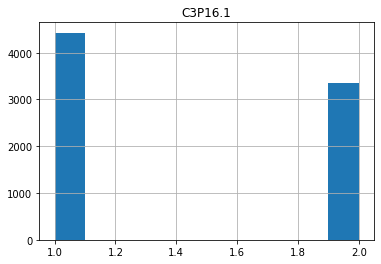

In [7]:
df.hist(column = ['C3P16.1'])
df['C3P16.1'].value_counts()

Vemos que contamos con 4428 varones y 3362 mujeres, y no hay valores nulos en este atributo. Realicemos ahora las distribuciones de ingresos para cada sexo.

In [8]:
df_ingresos = df[["C3P16.1", "ingreso_op"]]
df_ingresos_V = df_ingresos[df_ingresos['C3P16.1'] == 1]
df_ingresos_M = df_ingresos[df_ingresos['C3P16.1'] == 2]
df_ingresos.describe()

,C3P16.1,ingreso_op
count,7790.000000,7790.000000
mean,1.431579,18071.982157
std,0.495328,18347.731582
min,1.000000,100.000000
25%,1.000000,7000.000000
50%,1.000000,15000.000000
75%,2.000000,24000.000000
max,2.000000,600000.000000


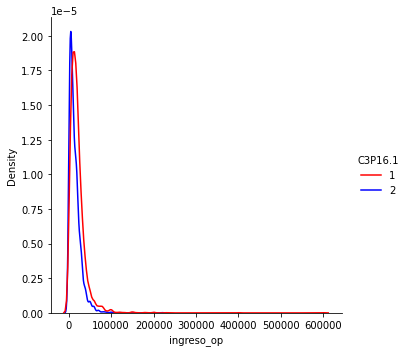

In [9]:
import seaborn as sns
sns.displot(data=df_ingresos, x="ingreso_op", hue="C3P16.1" , kind="kde", palette=["red","blue"])

Observamos que la distribución de salarios de los hombres presenta un sesgo a la derecha respecto a la de las mujeres. Retiraré los valores atípicos para obtener una mejor figura.

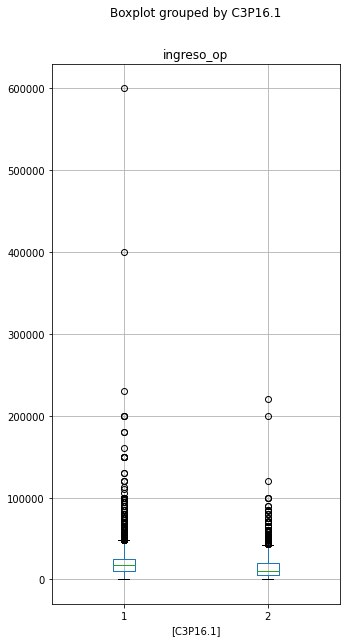

In [10]:
df_ingresos.boxplot(column=['ingreso_op'], by=["C3P16.1"], figsize=[5,10])

Observamos que hay muchísimos valores atípicos por encima del valor umbral 1.5*(Q3 - Q1). Contemos si representan un número significante.

In [11]:
max_thresold_V = 1.5 *(df_ingresos_V['ingreso_op'].quantile(0.75) - df_ingresos_V['ingreso_op'].quantile(0.25))
max_thresold_M = 1.5 *(df_ingresos_M['ingreso_op'].quantile(0.75) - df_ingresos_M['ingreso_op'].quantile(0.25))
max_thresold_V, max_thresold_M

(22500.0, 22500.0)

Además el valor umbral para ambos sexos es el mismo. Contemos cuántos valores atípicos hay por encima de este valor.

In [12]:
df_ingresos[df_ingresos['ingreso_op'] > max_thresold_V]

,C3P16.1,ingreso_op
2,2,32000
6,1,48000
9,2,100000
11,1,36000
15,1,150000
...,...,...
8956,2,25000
8961,1,30000
8962,1,70000
8964,1,30000


Más de 2000 registros encontrados. Deberemos elegir otro valor umbral. Por ejemplo, aquellos valores que se encuentren por encima del cuartil 95%.

In [13]:
max_thresold_V = df_ingresos_V['ingreso_op'].quantile(0.95)
max_thresold_M = df_ingresos_M['ingreso_op'].quantile(0.95)
max_thresold_V, max_thresold_M

(50000.0, 40000.0)

Estos valores tienen mejor pinta. Eliminaremos los registros que presenten un ingreso mayor a 50000.

In [14]:
df = df[df['ingreso_op'] <= max_thresold_V]
#df_ingresos = df_ingresos[df_ingresos['ingreso_op'] <= max_thresold_V]
df['ingreso_op'].describe()

count     7519.000000
mean     15860.235404
std      11245.320107
min        100.000000
25%       7000.000000
50%      14000.000000
75%      22000.000000
max      50000.000000
Name: ingreso_op, dtype: float64

Nos quedamos con 7519 registros de un total de 7790. Por lo tanto, seguimos teniendo un número significativo para realizar el análisis.

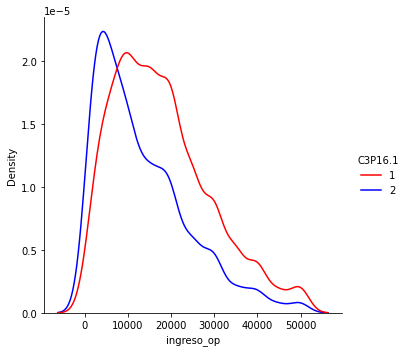

In [15]:
sns.displot(data=df, x="ingreso_op", hue="C3P16.1" , kind="kde", palette=["red","blue"])

Aquí se ve claramente cómo la distribución de salarios de los hombres presenta un sesgo hacia la derecha respecto de la de mujeres. Por lo tanto, si tenemos en cuenta todos los trabajos, sin realizar ninguna discriminación ocupacional, observamos que la diferencia de salarios es real.

## **Diferencia de salarios por sector**

Lo que me interesa ver ahora es la diferencia de salarios por sector. Para ello utilizaré el atributo "ramacaes_o" que indica las actividades enonómicas por agrupación, siendo:

1 - Actividades primarias

2 - Industria manufacturera

3 - Construcción

4 - Comercio

5 - Hoteles y restaurantes

6 - Transporte, alm y comunic

7 - Serv financ, inm, alq y emp

8 - Administración pública y defensa

9 - Enseñanza

10 - Servicios sociales y de salud

11 - Trabajo doméstico

12 - Otros serv comunit, soc y per

13 - Otras ramas

99 - Sin especificar

In [16]:
df[df.ramacaes_o == 99]['C3P16.1'].value_counts()

1    15
2     4
Name: C3P16.1, dtype: int64

Nos desprendemos de los registros con valor igual a 99 en el atributo "ramacaes_o" ya que son solamente 19.

In [17]:
df = df[df['ramacaes_o'] != 99]
#df_ingresos['ramacaes_o'] = df['ramacaes_o']
#df_ingresos = df_ingresos[df_ingresos.ramacaes_o != 99]
df1 = df[['C3P16.1','ramacaes_o','ingreso_op']]
df1

,C3P16.1,ramacaes_o,ingreso_op
0,1,9,7000
2,2,7,32000
3,2,10,15000
6,1,7,48000
7,2,4,10000
...,...,...,...
8957,2,11,19000
8958,2,11,18000
8960,1,8,20000
8961,1,1,30000


Ahora quiero obtener la media de varones y mujeres en cada sector y calcular el gap.

In [18]:
sector_mean_V = df1[df1['C3P16.1'] == 1].groupby(['ramacaes_o']).mean()
sector_mean_M = df1[df1['C3P16.1'] == 2].groupby(['ramacaes_o']).mean()
sector_mean_ratio = sector_mean_M/sector_mean_V
sector_mean_ratio = sector_mean_ratio.drop(columns='C3P16.1') 
sector_mean_ratio["sector"] = ['Actividades primarias','Industria manufacturera','Construcción','Comercio','Hoteles y restaurantes','Transporte, alm y comunic','Serv financ, inm, alq y emp','Administración pública y defensa','Enseñanza','Servicios sociales y de salud','Trabajo doméstico','Otros serv comunit, soc y per','Otras ramas']
sector_mean_ratio = sector_mean_ratio.rename(columns={"ingreso_op": "ratio_ingresos"})
sector_mean_ratio = sector_mean_ratio.sort_values(by=['ratio_ingresos'])
sector_mean_ratio

,ratio_ingresos,sector
ramacaes_o,,
2,0.588429,Industria manufacturera
12,0.619830,"Otros serv comunit, soc y per"
4,0.691723,Comercio
5,0.731076,Hoteles y restaurantes
1,0.798224,Actividades primarias
13,0.821300,Otras ramas
10,0.850984,Servicios sociales y de salud
9,0.872122,Enseñanza
7,0.913364,"Serv financ, inm, alq y emp"


(0.0, 1.2)

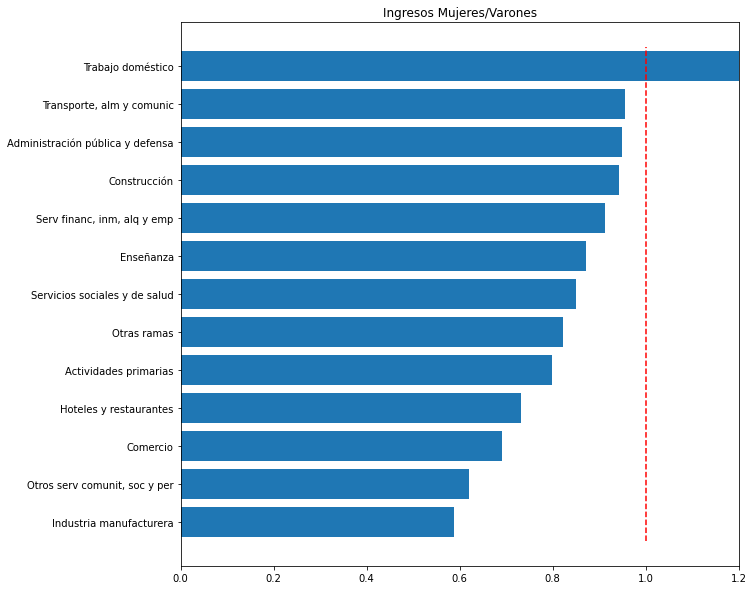

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

plt.barh(range(13),sector_mean_ratio.ratio_ingresos)
plt.yticks(range(13),sector_mean_ratio.sector, fontsize = 10)
plt.plot([1,1],[-0.5,12.5], '--',color = 'r')
plt.title('Ingresos Mujeres/Varones')
plt.xlim([0,1.2])

Observamos que en promedio las mujeres sólo superan el salario de los hombres en el sector "Trabajo doméstico". Incluso casi que duplican el salario promedio de los hombres.

En áreas como la industria manufacturera, las mujeres ganan un poco más de la mitad que los hombres. 

## **Diferencia de salarios por ocupación**

Vamos a puntualizar en trabajos individuales e intentar observar en cuáles las mujeres ganan más y en cuáles menos. Para ello utilizaremos el atributo "ocupa_cno" cuyos valores refieren al Clasificador Nacional de Ocupaciones (CNO).

In [20]:
df[['C3P16.1','ramacaes_o','ingreso_op','ocupa_cno']].describe()

,C3P16.1,ramacaes_o,ingreso_op,ocupa_cno
count,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.438267,6.384533,15855.721333,46672.223333
std,0.496207,3.207269,11240.032416,22361.150554
min,1.000000,1.000000,100.000000,1001.000000
25%,1.000000,4.000000,7000.000000,30314.000000
50%,1.000000,6.000000,14000.000000,47313.000000
75%,2.000000,9.000000,22000.000000,60203.000000
max,2.000000,13.000000,50000.000000,99999.000000


El máximo valor del atributo "ocupa_cno" es 99999, pero observando la clasificación en [CNO_2017](https://www.indec.gob.ar/ftp/cuadros/menusuperior/clasificadores/CNO_2017.pdf), el valor máximo es 92332. Veamos si este valor corresponde a casos donde no se informó la ocupación o faltan clasificaciones en la referencia encontrada.

In [21]:
df[df['ocupa_cno']>92332]['ocupa_cno']

2713    99998
2929    99999
6660    99999
7361    99999
Name: ocupa_cno, dtype: int64

Como solamente cuento con 4 registros con este valor, decido desprenderme de ellos ya que no tengo cómo calificarlos.

In [22]:
df = df[df['ocupa_cno'] <= 92332]
df2 = df[['C3P16.1','ramacaes_o','ingreso_op','ocupa_cno']]
df2.describe()

,C3P16.1,ramacaes_o,ingreso_op,ocupa_cno
count,7496.000000,7496.000000,7496.000000,7496.000000
mean,1.438100,6.383671,15853.523212,46643.767343
std,0.496187,3.207866,11238.121351,22333.146631
min,1.000000,1.000000,100.000000,1001.000000
25%,1.000000,4.000000,7000.000000,30314.000000
50%,1.000000,6.000000,14000.000000,47313.000000
75%,2.000000,9.000000,22000.000000,60113.250000
max,2.000000,13.000000,50000.000000,92332.000000


Cuento con muchísimas ocupaciones que van desde la 1001 hasta la 92332. Observando la clasificación en [CNO_2017](https://www.indec.gob.ar/ftp/cuadros/menusuperior/clasificadores/CNO_2017.pdf) se puede ver que los primeros 2 dígitos de un código indican la ocupación, el tercer dígito distingue entre cuenta propia, jefe y trabajadores y los últimos dos son más específicos de cada trabajo. Por lo que decido agrupar los valores que coincidan en los primeros dos dígitos, es decir, en las unidades de diez mil y mil.

In [23]:
df3 = df2.copy() #Hago una copia para conservar las ocupaciones originales
df3['ocupa_cno'] = df3['ocupa_cno'].apply(lambda x: int(x*0.001))

occupation_mean_V = df3[df3['C3P16.1'] == 1].groupby(['ocupa_cno']).mean().drop(columns=['C3P16.1','ramacaes_o'])
occupation_mean_M = df3[df3['C3P16.1'] == 2].groupby(['ocupa_cno']).mean().drop(columns=['C3P16.1','ramacaes_o'])
#occupation_mean_V = occupation_mean_V.rename(columns={"ingreso_op": "ingresos Varones"})
#occupation_mean_M = occupation_mean_M.rename(columns={"ingreso_op": "ingresos Mujeres"})
occupation_mean = pd.concat([occupation_mean_V.rename(columns={"ingreso_op": "ingresos Varones"}), occupation_mean_M.rename(columns={"ingreso_op": "ingresos Mujeres"})], axis=1)
occupation_mean = occupation_mean.reset_index().fillna(0)   #Los valores NaN indican que no hay presencia de dicho género en la ocupación correspondiente. Los reemplazo por cero.
occupation_mean

,ocupa_cno,ingresos Varones,ingresos Mujeres
0,1,28000.000000,17500.000000
1,3,29450.000000,32166.666667
2,4,50000.000000,20000.000000
3,5,24772.413793,23000.000000
4,6,23306.493506,19729.166667
5,7,24798.360656,20200.000000
6,10,22100.114815,20776.208459
7,11,27891.176471,23975.675676
8,20,24044.135593,20526.737968
9,30,17532.597403,11850.772429


De esta forma, me quedé con 50 ocupaciones distintas. Ahora calcularé los ratios entre mujeres y hombres para una misma ocupación. Luego, me quedo con los más bajos y los más altos para ver en qué ocupaciones las mujeres ganan menos que los hombres y en cuáles ganan más (en promedio).

In [24]:
occupation_mean['ratio_ingresos'] = occupation_mean.apply(lambda x: x['ingresos Mujeres']/x['ingresos Varones'], axis=1)
occupation_mean = occupation_mean.sort_values(by=['ratio_ingresos'])
occupation_mean

,ocupa_cno,ingresos Varones,ingresos Mujeres,ratio_ingresos
41,70,36071.428571,0.000000,0.000000
40,64,7733.333333,0.000000,0.000000
48,91,37000.000000,0.000000,0.000000
16,39,15000.000000,0.000000,0.000000
47,90,26106.382979,4500.000000,0.172372
10,31,17568.750000,4777.777778,0.271948
39,63,22750.000000,7557.500000,0.332198
46,82,13562.666667,4545.652174,0.335159
32,55,15106.666667,5385.634744,0.356507
2,4,50000.000000,20000.000000,0.400000


Se puede observar que en las primeras 4 ocupaciones no tengo presencia femenina. Éstas son: "Desarrollo Tecnológico Productivo", "Sin especificar", "Producción Pesquera", "Producción Extractiva". Me desprendo de ellas para hacer la comparación.

In [25]:
occupation_mean = occupation_mean.iloc[4:,:]

In [26]:
occupation_mean[occupation_mean.ratio_ingresos>=1]['ratio_ingresos'].describe()

count    11.000000
mean      1.912158
std       2.294304
min       1.003799
25%       1.034709
50%       1.092247
75%       1.354869
max       8.750000
Name: ratio_ingresos, dtype: float64

Solamente en 11 de 50 ocupaciones las mujeres ganan más que los hombres en promedio (20%). Veamos de qué ocupaciones se trata.

In [27]:
occupation_mean_least = occupation_mean.head(n=5)
occupation_mean_most = occupation_mean.tail(n=5)
#occupation_mean_most = occupation_mean_most.sort_values(by=['ratio_ingresos'], ascending=False)
occupation_mean_least , occupation_mean_most

(    ocupa_cno  ingresos Varones  ingresos Mujeres  ratio_ingresos
 47         90      26106.382979       4500.000000        0.172372
 10         31      17568.750000       4777.777778        0.271948
 39         63      22750.000000       7557.500000        0.332198
 46         82      13562.666667       4545.652174        0.335159
 32         55      15106.666667       5385.634744        0.356507,
     ocupa_cno  ingresos Varones  ingresos Mujeres  ratio_ingresos
 20         43      27125.000000      31187.500000        1.149770
 35         58       8274.444444      10118.181818        1.222823
 43         72      13704.965649      20378.125000        1.486915
 37         61      13733.333333      30000.000000        2.184466
 29         52       2000.000000      17500.000000        8.750000)

Reemplazo los códigos por la correspondiente ubicación. Podemos encontrar la clasificación en: [CNO_2017](https://www.indec.gob.ar/ftp/cuadros/menusuperior/clasificadores/CNO_2017.pdf)

In [28]:
occupation_mean_least["occupation"] = ['Instalación y mantenimiento de maquinarias, equipos y sistemas de la producción de bienes',
                                      'Corretaje comercial, venta domiciliaria, preventista, viajantes y promotores',
                                      'Producción apícola-avícola y de otras especies menores',
                                       'Reparación de bienes de consumo',
                                       'Servicios domésticos']
occupation_mean_most["occupation"] = ['Asesoría y consultoría',
                                      'Servicios varios',
                                      'Construcción edilicia y de obras de infraestructura',
                                      'Producción ganadera',
                                      'Servicios de recreación']
occupation_mean_least, occupation_mean_most                                     

(    ocupa_cno  ...                                         occupation
 47         90  ...  Instalación y mantenimiento de maquinarias, eq...
 10         31  ...  Corretaje comercial, venta domiciliaria, preve...
 39         63  ...  Producción apícola-avícola y de otras especies...
 46         82  ...                    Reparación de bienes de consumo
 32         55  ...                               Servicios domésticos
 
 [5 rows x 5 columns],
     ocupa_cno  ...                                         occupation
 20         43  ...                             Asesoría y consultoría
 35         58  ...                                   Servicios varios
 43         72  ...  Construcción edilicia y de obras de infraestru...
 37         61  ...                                Producción ganadera
 29         52  ...                            Servicios de recreación
 
 [5 rows x 5 columns])

Text(0.5, 1.0, 'Menores Ingresos Mujeres/Varones')

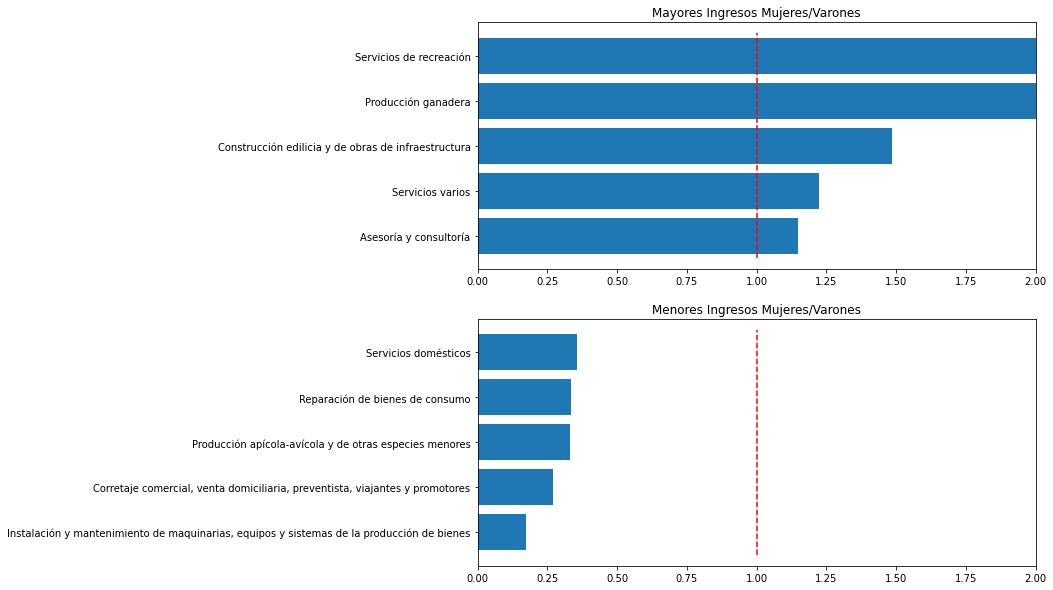

In [29]:
plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
plt.barh(range(5),occupation_mean_most.ratio_ingresos)
plt.yticks(range(5),occupation_mean_most.occupation, fontsize = 10)
plt.plot([1,1],[-0.5,4.5], '--',color = 'r')
plt.xlim([0,2])
plt.title('Mayores Ingresos Mujeres/Varones')

plt.subplot(2,1,2)
plt.barh(range(5),occupation_mean_least.ratio_ingresos)
plt.yticks(range(5),occupation_mean_least.occupation, fontsize = 10)
plt.plot([1,1],[-0.5,4.5], '--',color = 'r')
plt.xlim([0,2])
plt.title('Menores Ingresos Mujeres/Varones')

Al observar los ingresos en promedio por ocupación de las mujeres respecto de los varones obtenemos resultados no sorprendentes, en comparación a cuando observamos respecto de los sectores laborales más generales. Sin embargo, me llama la atención la categoría "Servicios Domésticos". Esta ocupación ocupa un puesto bastante bajo, pero cuando habíamos observado por sector figuraba primera. Por eso, procedo a ver qué ocurre con las subcategorías.

In [30]:
occupation_mean_V = df2[df2['C3P16.1'] == 1].groupby(['ocupa_cno']).mean().drop(columns=['C3P16.1','ramacaes_o'])   
occupation_mean_M = df2[df2['C3P16.1'] == 2].groupby(['ocupa_cno']).mean().drop(columns=['C3P16.1','ramacaes_o'])

occupation_mean_domestico = pd.concat([occupation_mean_V.rename(columns={"ingreso_op": "ingresos Varones"}), occupation_mean_M.rename(columns={"ingreso_op": "ingresos Mujeres"})], axis=1) 
occupation_mean_domestico['ratio_ingresos'] = occupation_mean_domestico.apply(lambda x: x['ingresos Mujeres']/x['ingresos Varones'], axis=1)
occupation_mean_domestico = occupation_mean_domestico.reset_index().fillna(0)

# La categoría servicios domésticos corresponde a los códigos con 55 unidades de mil.

df_mask=occupation_mean_domestico['ocupa_cno']<56000
filtered_df = occupation_mean_domestico[df_mask]
df_mask=filtered_df['ocupa_cno']>=55000
occupation_mean_domestico = filtered_df[df_mask]

occupation_mean_domestico

,ocupa_cno,ingresos Varones,ingresos Mujeres,ratio_ingresos
168,55114,0.0,1200.000000,0.000000
169,55313,13800.0,0.000000,0.000000
170,55314,15760.0,5394.977679,0.342321


Aquí observamos que existen tres ocupaciones dentro de la categoría "Servicios domésticos", según el CNO. Claramente se ve que los varones ganan mucho más. Sin embargo, el atributo "ramacaes_o" que habíamos utilizado para calcular el gap por sector corresponde al Clasificador de Actividades Económicas para Encuestas Sociodemográficas del Mercosur (CAES). Por lo tanto son clasificadores correspondientes a organismos distintos. Observemos si todos lo registros correspondientes a estas ocupaciones se encuentran dentro del sector "Trabajo Doméstico" según el CAES.

In [31]:
df2[(df2['ocupa_cno'] == 55114) | (df2['ocupa_cno'] == 55313) | (df2['ocupa_cno'] == 55314)]['C3P16.1'].value_counts()

2    449
1     15
Name: C3P16.1, dtype: int64

In [32]:
df_dom = df2[(df2['ocupa_cno'] == 55114) | (df2['ocupa_cno'] == 55313) | (df2['ocupa_cno'] == 55314)].drop(['ocupa_cno'], axis=1)
df_dom[df_dom['ramacaes_o'] == 11]['C3P16.1'].value_counts()

2    443
1      2
Name: C3P16.1, dtype: int64

Existen 464 registros correspondientes a "Servicios Domésticos" del CNO, de los cuales 445 se enmarcan en el sector "Trabajo Doméstico" del CAES. Por lo tanto, tenemos 19 registros que probablemente sean los responsables de la discrepancia obtenida. Llama la atención que un porcentaje tan chico afecte tanto. Veamos a qué sectores pertenecen.

In [33]:
df_dom_V = df_dom[df_dom['C3P16.1']==1].groupby(['ramacaes_o']).mean().reset_index()
df_dom_M = df_dom[df_dom['C3P16.1']==2].groupby(['ramacaes_o']).mean().reset_index()
df_dom = pd.concat([df_dom_V,df_dom_M])
df_dom

,ramacaes_o,C3P16.1,ingreso_op
0,2,1.0,40000.000000
1,3,1.0,8000.000000
2,4,1.0,48000.000000
3,5,1.0,13800.000000
4,6,1.0,7000.000000
5,8,1.0,14000.000000
6,10,1.0,20000.000000
7,11,1.0,2300.000000
0,5,2.0,3700.000000
1,7,2.0,13100.000000


In [34]:
sector_CAES = pd.Series(sector_mean_ratio["sector"])
aux = []
for x in df_dom['ramacaes_o']:
    aux.append(sector_CAES[x])

df_dom['sector'] = aux
df_dom = df_dom.drop(['ramacaes_o'], axis=1)
df_dom

,C3P16.1,ingreso_op,sector
0,1.0,40000.000000,Industria manufacturera
1,1.0,8000.000000,Construcción
2,1.0,48000.000000,Comercio
3,1.0,13800.000000,Hoteles y restaurantes
4,1.0,7000.000000,"Transporte, alm y comunic"
5,1.0,14000.000000,Administración pública y defensa
6,1.0,20000.000000,Servicios sociales y de salud
7,1.0,2300.000000,Trabajo doméstico
0,2.0,3700.000000,Hoteles y restaurantes
1,2.0,13100.000000,"Serv financ, inm, alq y emp"


In [35]:
df_dom_V = df_dom[df_dom['C3P16.1']==1].drop(['C3P16.1'], axis=1).rename(columns={"ingreso_op": "Ingresos Varones"})
df_dom_M = df_dom[df_dom['C3P16.1']==2].drop(['C3P16.1'], axis=1).rename(columns={"ingreso_op": "Ingresos Mujeres"})
df_dom2 = pd.merge(df_dom_V, df_dom_M, on="sector", how="outer")
df_dom2

,Ingresos Varones,sector,Ingresos Mujeres
0,40000.0,Industria manufacturera,NaN
1,8000.0,Construcción,NaN
2,48000.0,Comercio,NaN
3,13800.0,Hoteles y restaurantes,3700.000000
4,7000.0,"Transporte, alm y comunic",NaN
5,14000.0,Administración pública y defensa,NaN
6,20000.0,Servicios sociales y de salud,14250.000000
7,2300.0,Trabajo doméstico,5286.117381
8,NaN,"Serv financ, inm, alq y emp",13100.000000
9,NaN,Enseñanza,18000.000000


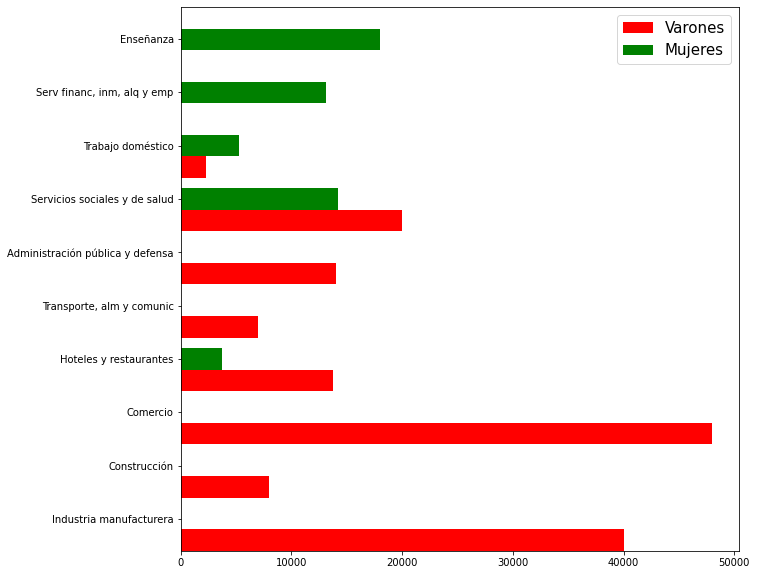

In [36]:
ind = np.arange(len(df_dom2))
width = 0.4

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(ind, df_dom2["Ingresos Varones"], width, color='red', label='Varones')
ax.barh(ind + width, df_dom2["Ingresos Mujeres"], width, color='green', label='Mujeres')

ax.set(yticks=ind + width, yticklabels=df_dom2.sector, ylim=[2*width - 1, len(df_dom2)])
ax.legend(fontsize=15)

plt.show()

Vemos que hay muchos sectores de CAES que corresponden a la misma ocupación del CNO ("Servicios domésticos") y que además corresponden a sectores donde se gana mucho más que en "Trabajo Doméstico". Por lo tanto, al realizar el promedio, por más que se trate de un número bajo afectan considerablemente. En el sector "Trabajo Doméstico" del CAES, las mujeres ganan más que los varones tal cual podíamos observar al principio.

De aquí podemos observar que registros mal incluidos, pueden llevar a conclusiones erróneas si no los tratamos con cuidado. Incluso cuando el número es muy bajo respecto al total. Si nos hubiésemos guiado solamente por el clasificador del CNO podríamos haber concluido erróneamente que las mujeres ganan menos que los hombres en "Servicios Domésticos". Por lo tanto, vamos a desprendernos de estos registros ya que pueden indicar un error humano al completar la encuesta. Es imposible determinar cuál de los dos clasificadores indica lo correcto.

In [37]:
indexNames = df2[ ((df2['ocupa_cno'] == 55114) | (df2['ocupa_cno'] == 55313) | (df2['ocupa_cno'] == 55314))
                & (df2['ramacaes_o'] != 11) ].index
df2 = df2.drop(indexNames , inplace=False)

In [38]:
df3 = df2.copy() #Hago una copia para conservar las ocupaciones originales
df3['ocupa_cno'] = df3['ocupa_cno'].apply(lambda x: int(x*0.001))

occupation_mean_V = df3[df3['C3P16.1'] == 1].groupby(['ocupa_cno']).mean().drop(columns=['C3P16.1','ramacaes_o'])
occupation_mean_M = df3[df3['C3P16.1'] == 2].groupby(['ocupa_cno']).mean().drop(columns=['C3P16.1','ramacaes_o'])
occupation_mean = pd.concat([occupation_mean_V.rename(columns={"ingreso_op": "ingresos Varones"}), occupation_mean_M.rename(columns={"ingreso_op": "ingresos Mujeres"})], axis=1)
occupation_mean = occupation_mean.reset_index().fillna(0)

occupation_mean['ratio_ingresos'] = occupation_mean.apply(lambda x: x['ingresos Mujeres']/x['ingresos Varones'], axis=1)
occupation_mean = occupation_mean.sort_values(by=['ratio_ingresos'])

occupation_mean = occupation_mean.iloc[4:,:]     #Vuelvo a sacar aquellas ocupaciones donde no hay presencia femenina

occupation_mean_least = occupation_mean.head(n=5)
occupation_mean_most = occupation_mean.tail(n=5)

occupation_mean_least , occupation_mean_most

(    ocupa_cno  ingresos Varones  ingresos Mujeres  ratio_ingresos
 47         90      26106.382979       4500.000000        0.172372
 10         31      17568.750000       4777.777778        0.271948
 39         63      22750.000000       7557.500000        0.332198
 46         82      13562.666667       4545.652174        0.335159
 2           4      50000.000000      20000.000000        0.400000,
     ocupa_cno  ingresos Varones  ingresos Mujeres  ratio_ingresos
 35         58       8274.444444      10118.181818        1.222823
 43         72      13704.965649      20378.125000        1.486915
 37         61      13733.333333      30000.000000        2.184466
 32         55       2300.000000       5286.117381        2.298312
 29         52       2000.000000      17500.000000        8.750000)

Text(0.5, 1.0, 'Menores Ingresos Mujeres/Varones')

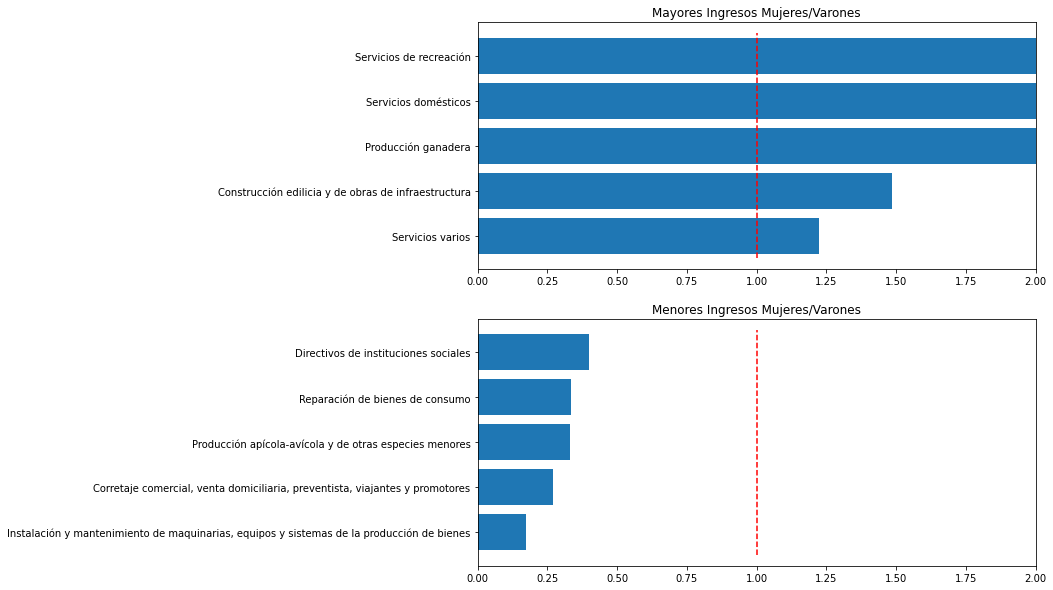

In [39]:
occupation_mean_least["occupation"] = ['Instalación y mantenimiento de maquinarias, equipos y sistemas de la producción de bienes',
                                      'Corretaje comercial, venta domiciliaria, preventista, viajantes y promotores',
                                      'Producción apícola-avícola y de otras especies menores',
                                       'Reparación de bienes de consumo',
                                       'Directivos de instituciones sociales']
occupation_mean_most["occupation"] = ['Servicios varios',
                                      'Construcción edilicia y de obras de infraestructura',
                                      'Producción ganadera',
                                      'Servicios domésticos',
                                      'Servicios de recreación']
#occupation_mean_least, occupation_mean_most            

plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
plt.barh(range(5),occupation_mean_most.ratio_ingresos)
plt.yticks(range(5),occupation_mean_most.occupation, fontsize = 10)
plt.plot([1,1],[-0.5,4.5], '--',color = 'r')
plt.xlim([0,2])
plt.title('Mayores Ingresos Mujeres/Varones')

plt.subplot(2,1,2)
plt.barh(range(5),occupation_mean_least.ratio_ingresos)
plt.yticks(range(5),occupation_mean_least.occupation, fontsize = 10)
plt.plot([1,1],[-0.5,4.5], '--',color = 'r')
plt.xlim([0,2])
plt.title('Menores Ingresos Mujeres/Varones')

Con dichos registros descartados, vemos que la ocupación "Servicios domésticos" es la segunda donde las mujeres ganan más respecto de los hombres (por encima del doble). Esto se corresponde con los salarios por sector del CAES observados inicialmente.

## **Diferencia de salarios en ocupaciones mejor y peor pagas**

Dicho esto debemos hacer la aclaración que los campos donde las mujeres ganan menos respecto del salario de los hombres pueden no ser aquellos donde se pague más. Esto implica que solamente prestarle atención al género al analizar las diferencias puede ser muy simplista. Por lo tanto, busquemos aquellas ocupaciones mejor y peor pagas.

In [40]:
sorted_df_ingresos = df3.groupby(['ocupa_cno']).mean().drop(columns=['C3P16.1','ramacaes_o'])
sorted_df_ingresos = sorted_df_ingresos.reset_index()

sorted_df_ingresos = sorted_df_ingresos.sort_values(['ingreso_op'], ascending = [True])

#sorted_df_ingresos

df_ingresos_most = sorted_df_ingresos.tail(5)
df_ingresos_least = sorted_df_ingresos.head(5)

print(df_ingresos_most)
print(df_ingresos_least)

    ocupa_cno    ingreso_op
45         81  29669.791667
1           3  31196.428571
2           4  35000.000000
41         70  36071.428571
48         91  37000.000000
    ocupa_cno   ingreso_op
32         55  5272.696629
12         33  5527.777778
34         57  7380.222222
40         64  7733.333333
38         62  7988.888889


Text(0.5, 1.0, 'Ocupaciones peor pagas')

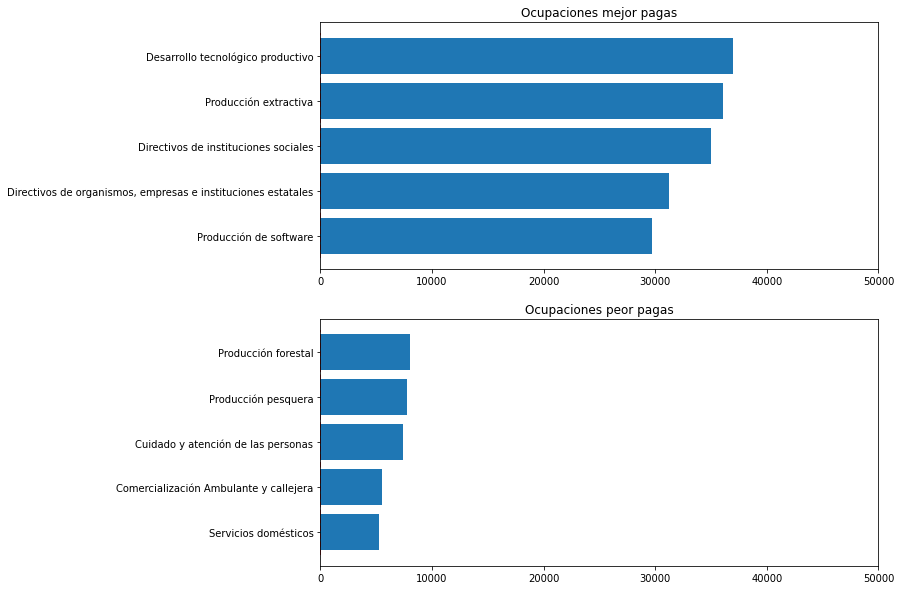

In [41]:
df_ingresos_most["occupation"] = ['Producción de software',
                                  'Directivos de organismos, empresas e instituciones estatales',
                                  'Directivos de instituciones sociales',
                                  'Producción extractiva',
                                  'Desarrollo tecnológico productivo']
df_ingresos_least["occupation"] = ['Servicios domésticos',
                                    'Comercialización Ambulante y callejera',
                                     'Cuidado y atención de las personas',
                                     'Producción pesquera',
                                     'Producción forestal']

plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
plt.barh(range(5),df_ingresos_most.ingreso_op)
plt.yticks(range(5),df_ingresos_most.occupation, fontsize = 10)
plt.plot([1,1],[-0.5,4.5], '--',color = 'r')
plt.xlim([0,50000])
plt.title('Ocupaciones mejor pagas')

plt.subplot(2,1,2)
plt.barh(range(5),df_ingresos_least.ingreso_op)
plt.yticks(range(5),df_ingresos_least.occupation, fontsize = 10)
plt.plot([1,1],[-0.5,4.5], '--',color = 'r')
plt.xlim([0,50000])
plt.title('Ocupaciones peor pagas')

En general, las ocupaciones mejor pagas tienden a estar dominadas por hombres.Recordemos que las dos ocupaciones mejor pagas ('Desarrollo tecnológico productivo' y 'Producción extractiva') no contaban con presencia femenina. Resulta interesante además que la ocupación peor paga coincide con aquella donde las mujeres duplican el salario de los hombres: "Servicios Domésticos".  Veamos el salario de mujeres respecto de hombres en las ocupaciones mejor y peor pagas. Antes me desprendo de las ocupaciones donde no hay presencia femenina.

In [42]:
indexNames = df3[ ((df3['ocupa_cno'] == 70) | (df3['ocupa_cno'] == 64) | (df3['ocupa_cno'] == 91) | (df3['ocupa_cno'] == 39))].index
df3 = df3.drop(indexNames , inplace=False)

sorted_df_ingresos2 = df3.groupby(['ocupa_cno']).mean().drop(columns=['C3P16.1','ramacaes_o'])
sorted_df_ingresos2 = sorted_df_ingresos2.reset_index()

sorted_df_ingresos2 = sorted_df_ingresos2.sort_values(['ingreso_op'], ascending = [True])

#sorted_df_ingresos

df_ingresos_most = sorted_df_ingresos2.tail(5)
df_ingresos_least = sorted_df_ingresos2.head(5)

print(df_ingresos_most)
print(df_ingresos_least)

    ocupa_cno    ingreso_op
25         49  27813.953488
19         43  28027.777778
42         81  29669.791667
1           3  31196.428571
2           4  35000.000000
    ocupa_cno   ingreso_op
31         55  5272.696629
12         33  5527.777778
33         57  7380.222222
37         62  7988.888889
34         58  8475.247525


In [43]:
df_ingresos_most["occupation"] = ['FFA, Gendarmería y Prefectura',
                                  'Asesoría y Consultoría',
                                  'Producción de software',
                                  'Directivos de organismos, empresas e instituciones estatales',
                                  'Directivos de instituciones sociales']
df_ingresos_least["occupation"] = ['Servicios domésticos',
                                    'Comercialización Ambulante y callejera',
                                     'Cuidado y atención de las personas',
                                     'Producción forestal',
                                   'Servicios Varios']

In [44]:
sorted_df_ingresos2_V = df3[df3['C3P16.1'] == 1].groupby(['ocupa_cno']).mean().drop(columns=['C3P16.1','ramacaes_o'])
sorted_df_ingresos2_M = df3[df3['C3P16.1'] == 2].groupby(['ocupa_cno']).mean().drop(columns=['C3P16.1','ramacaes_o'])

sorted_df_ingresos2 = pd.concat([sorted_df_ingresos2_V.rename(columns={"ingreso_op": "ingresos Varones"}), sorted_df_ingresos2_M.rename(columns={"ingreso_op": "ingresos Mujeres"})], axis=1)

most_V = []
most_M = []
for x in df_ingresos_most['ocupa_cno']:
  most_V.append(sorted_df_ingresos2.loc[x,'ingresos Varones'])
  most_M.append(sorted_df_ingresos2.loc[x,'ingresos Mujeres'])

sorted_df_ingresos2_most = pd.DataFrame({'occupation': df_ingresos_most.occupation, 'ingresos Varones': most_V, 'ingresos Mujeres': most_M})
sorted_df_ingresos2_most['ratio_ingresos'] = sorted_df_ingresos2_most.apply(lambda x: x['ingresos Mujeres']/x['ingresos Varones'], axis=1) 
sorted_df_ingresos2_most.fillna(0)

mean_most = sorted_df_ingresos2_most['ratio_ingresos'].mean()

least_V = []
least_M = []
for x in df_ingresos_least['ocupa_cno']:
  least_V.append(sorted_df_ingresos2.loc[x,'ingresos Varones'])
  least_M.append(sorted_df_ingresos2.loc[x,'ingresos Mujeres'])

sorted_df_ingresos2_least = pd.DataFrame({'occupation': df_ingresos_least.occupation, 'ingresos Varones': least_V, 'ingresos Mujeres': least_M})
sorted_df_ingresos2_least['ratio_ingresos'] = sorted_df_ingresos2_least.apply(lambda x: x['ingresos Mujeres']/x['ingresos Varones'], axis=1) 
sorted_df_ingresos2_least.fillna(0)

mean_least = sorted_df_ingresos2_least['ratio_ingresos'].mean()

meandf = pd.DataFrame({'ocupaciones': ['5 ocupaciones mejor pagas', '5 ocupaciones peor pagas'], 'ratio_ingresos': [mean_most, mean_least]})

Text(0.5, 1.0, 'Ingresos Mujeres/Varones (promedio)')

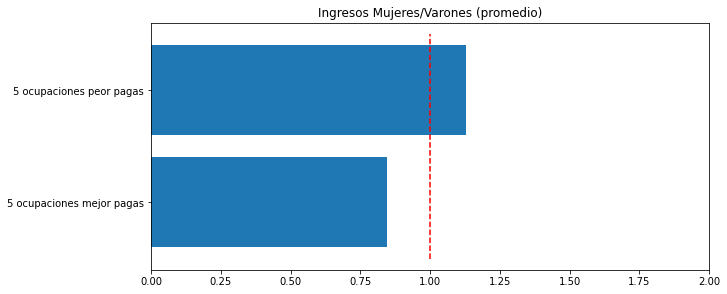

In [45]:
plt.figure(figsize = (10,10))

plt.subplot(2,1,2)
plt.barh(range(2),meandf.ratio_ingresos)
plt.yticks(range(2),meandf.ocupaciones, fontsize = 10)
plt.plot([1,1],[-0.5,1.5], '--',color = 'r')
plt.xlim([0,2])
plt.title('Ingresos Mujeres/Varones (promedio)')

Observamos que en promedio, en las ocupaciones peor pagas las mujeres ganan más que los hombres respecto de las ocupaciones mejor pagas. Por lo tanto, pareciera que la diferencia de salarios se hace más evidente en aquellas ocupaciones donde se paga más. Exploremos esta diferencia, a ver si el gap presenta un comportamiento creciente.

In [46]:
indexNames = sorted_df_ingresos[ ((sorted_df_ingresos['ocupa_cno'] == 70) | (sorted_df_ingresos['ocupa_cno'] == 64) | (sorted_df_ingresos['ocupa_cno'] == 91) | (sorted_df_ingresos['ocupa_cno'] == 39))].index
sorted_df_ingresos = sorted_df_ingresos.drop(indexNames , inplace=False)

sorted_df_ingresos2 = sorted_df_ingresos2.reset_index()

ingresos_df = pd.merge(sorted_df_ingresos, sorted_df_ingresos2, on="ocupa_cno")


In [47]:
ingresos_df['ratio_ingresos'] = ingresos_df.apply(lambda x: x['ingresos Mujeres']/x['ingresos Varones'], axis=1)
ingresos_df = ingresos_df.sort_values(['ingreso_op'], ascending = [True])
ingresos_df

,ocupa_cno,ingreso_op,ingresos Varones,ingresos Mujeres,ratio_ingresos
0,55,5272.696629,2300.000000,5286.117381,2.298312
1,33,5527.777778,6878.048780,4143.750000,0.602460
2,57,7380.222222,10357.142857,7109.593074,0.686443
3,62,7988.888889,8137.500000,6800.000000,0.835637
4,58,8475.247525,8274.444444,10118.181818,1.222823
5,60,10561.111111,11201.612903,6590.000000,0.588308
6,53,10899.372822,13022.586207,9459.064327,0.726358
7,56,12196.974478,14144.961353,10396.825893,0.735020
8,52,12333.333333,2000.000000,17500.000000,8.750000
9,82,12525.710000,13562.666667,4545.652174,0.335159


Antes de realizar el gráfico, voy a retirar la ocupación 52 correspondiente a 'Servicios de recreación' ya que el gap es 8.75, muy superior al resto.

In [48]:
ingresos_df = ingresos_df[(ingresos_df['ocupa_cno'] != 52)]

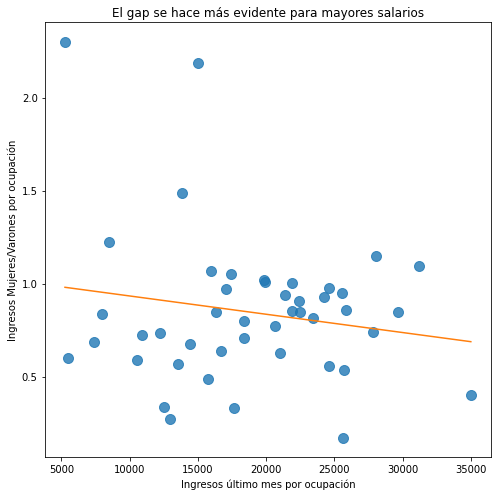

In [49]:
plt.figure(figsize = (8,8))

plt.plot(ingresos_df.ingreso_op, ingresos_df.ratio_ingresos,'o',markersize = 10, alpha = 0.8)
plt.xlabel('Ingresos último mes por ocupación')
plt.ylabel('Ingresos Mujeres/Varones por ocupación')
plt.title('El gap se hace más evidente para mayores salarios')

x = ingresos_df.ingreso_op
y = ingresos_df.ratio_ingresos
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x))

Intentemos ahora ver el ingreso promedio de hombres y mujeres en función del ingreso promedio total.

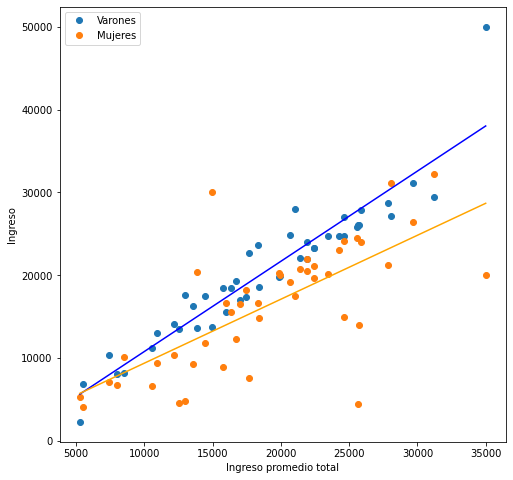

In [50]:
plt.figure(figsize = (8,8))

plt.plot(ingresos_df.ingreso_op, ingresos_df['ingresos Varones'],'o')
plt.plot(ingresos_df.ingreso_op, ingresos_df['ingresos Mujeres'],'o')
plt.legend(['Varones','Mujeres'])
plt.xlabel('Ingreso promedio total')
plt.ylabel('Ingreso')
#plt.show()

x = ingresos_df.ingreso_op
y = ingresos_df['ingresos Varones']
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x), 'blue')

x = ingresos_df.ingreso_op
y = ingresos_df['ingresos Mujeres']
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x), 'orange')

En el caso de los varones, los ingresos parecen comportarse de manera lineal. Para el caso de las mujeres se observa una dispersión mayor de los datos, pero se observa una pequeña tendencia lineal. 

Haciendo un fiteo lineal de los datos podemos ver que la pendiente en el caso de los hombres es mayor al de las mujeres. Esto al igual que antes indica que cuánto mayor sea el salario, mayor es la diferencia entre géneros.

## **Preparación de datos para aplicar distintos modelos**

Vamos a generar un nuevo dataset con los siguientes atributos para predecir la disparidad de géneros con distintos modelos de clustering, clasificación y regresión.

*   occupation_number
*   cantidad_trabajadores
*   ingresos_promedio
*   hombres_trabajadores
*   ingresos_hombres
*   mujeres_trabajadores
*   ingresos_mujeres
*   hombres_ratio
*   mujeres_ratio
*   ingresos_promedio_hym
*   ratio_ingresos
*   dif_ingresos
*   ratio_trabajadores
*   genero_prob

In [51]:
df_model = df[['C3P16.1','ingreso_op','rama_caes']].rename(columns={'C3P16.1': 'genero'})   #En este caso utilizo la clasificación del Mercosur, para usar otro atributo distinto
df_model.describe()

,genero,ingreso_op,rama_caes
count,7496.000000,7496.000000,7496.000000
mean,1.438100,15853.523212,6182.627668
std,0.496187,11238.121351,2682.232510
min,1.000000,100.000000,10.000000
25%,1.000000,7000.000000,4502.000000
50%,1.000000,14000.000000,6100.000000
75%,2.000000,22000.000000,8501.000000
max,2.000000,50000.000000,9700.000000


In [52]:
ingresos_promedio = pd.DataFrame(df_model.groupby(['rama_caes']).mean())
ingresos_promedio = ingresos_promedio.reset_index().drop(columns='genero')
ingresos_promedio = ingresos_promedio.rename(columns={'rama_caes': 'occupation_number', 'ingreso_op': 'ingresos_promedio'})
ingresos_promedio.shape

(128, 2)

In [53]:
hombres_trabajadores = pd.DataFrame(df_model[df_model['genero']==1].groupby(['rama_caes']).sum())
hombres_trabajadores = hombres_trabajadores.reset_index().drop(columns='ingreso_op')
hombres_trabajadores = hombres_trabajadores.rename(columns={'rama_caes': 'occupation_number', 'genero': 'hombres_trabajadores'})
hombres_trabajadores.shape

(128, 2)

In [54]:
ingresos_hombres = pd.DataFrame(df_model[df_model['genero']==1].groupby(['rama_caes']).mean())
ingresos_hombres = ingresos_hombres.reset_index().drop(columns='genero')
ingresos_hombres = ingresos_hombres.rename(columns={'rama_caes': 'occupation_number', 'ingreso_op': 'ingresos_hombres'})
ingresos_hombres.shape

(128, 2)

In [55]:
mujeres_trabajadores = pd.DataFrame(df_model[df_model['genero']==2].groupby(['rama_caes']).sum())
mujeres_trabajadores = mujeres_trabajadores.reset_index().drop(columns='ingreso_op')
mujeres_trabajadores = mujeres_trabajadores.rename(columns={'rama_caes': 'occupation_number', 'genero': 'mujeres_trabajadores'})
mujeres_trabajadores.shape

(107, 2)

In [56]:
ingresos_mujeres = pd.DataFrame(df_model[df_model['genero']==2].groupby(['rama_caes']).mean())
ingresos_mujeres = ingresos_mujeres.reset_index().drop(columns='genero')
ingresos_mujeres = ingresos_mujeres.rename(columns={'rama_caes': 'occupation_number', 'ingreso_op': 'ingresos_mujeres'})
ingresos_mujeres.shape

(107, 2)

In [57]:
df_model = pd.merge(ingresos_promedio, hombres_trabajadores, on="occupation_number")
df_model = pd.merge(df_model, ingresos_hombres, on="occupation_number")
df_model = pd.merge(df_model, mujeres_trabajadores, on="occupation_number")
df_model = pd.merge(df_model, ingresos_mujeres, on="occupation_number")
df_model

,occupation_number,ingresos_promedio,hombres_trabajadores,ingresos_hombres,mujeres_trabajadores,ingresos_mujeres
0,48,15953.030303,41,17595.121951,50,13260.000000
1,101,11937.804878,72,12620.833333,20,7020.000000
2,102,15852.600000,20,15310.000000,10,18023.000000
3,103,17840.000000,17,16529.411765,6,25266.666667
4,104,13500.000000,2,13000.000000,4,14000.000000
...,...,...,...,...,...,...
102,9601,9588.888889,2,5000.000000,14,10900.000000
103,9602,9557.019802,18,10722.222222,166,9304.325301
104,9603,21814.285714,4,21250.000000,6,22566.666667
105,9609,9375.000000,7,11285.714286,10,6700.000000


In [58]:
df_model['cantidad_trabajadores'] = df_model.apply(lambda x: x['hombres_trabajadores']+x['mujeres_trabajadores'], axis=1)
df_model['hombres_ratio'] = df_model.apply(lambda x: x['hombres_trabajadores']/x['cantidad_trabajadores'], axis=1)
df_model['mujeres_ratio'] = df_model.apply(lambda x: x['mujeres_trabajadores']/x['cantidad_trabajadores'], axis=1)
df_model['ingresos_promedio_hym'] = df_model.apply(lambda x: (x['ingresos_hombres']+x['ingresos_mujeres'])/2, axis=1)
df_model['ratio_ingresos'] = df_model.apply(lambda x: x['ingresos_mujeres']/x['ingresos_hombres'], axis=1)
df_model['dif_ingresos'] = df_model.apply(lambda x: x['ingresos_hombres']-x['ingresos_mujeres'], axis=1)
df_model['ratio_trabajadores'] = df_model.apply(lambda x: x['mujeres_trabajadores']/x['hombres_trabajadores'], axis=1)
df_model.describe()

,occupation_number,ingresos_promedio,hombres_trabajadores,ingresos_hombres,mujeres_trabajadores,ingresos_mujeres,cantidad_trabajadores,hombres_ratio,mujeres_ratio,ingresos_promedio_hym,ratio_ingresos,dif_ingresos,ratio_trabajadores
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,5055.579439,18462.329482,38.626168,20338.850642,61.383178,15515.065165,100.009346,0.508339,0.491661,17926.957903,0.804377,4823.785477,5.780411
std,2964.465267,7034.795951,91.442066,8076.220778,169.212920,7717.611289,214.861100,0.249596,0.249596,6953.093330,0.392556,7496.112639,39.004047
min,48.000000,3876.923077,1.000000,3200.000000,2.000000,500.000000,3.000000,0.002469,0.022222,4347.950495,0.046059,-16000.000000,0.022727
25%,2450.000000,13656.854249,6.500000,15944.362745,4.000000,9971.061644,14.500000,0.333333,0.266667,13053.373016,0.581186,1289.204545,0.363636
50%,4903.000000,17571.428571,15.000000,19231.134831,8.000000,14666.666667,26.000000,0.500000,0.500000,17140.909091,0.739927,4583.333333,1.000000
75%,7650.000000,22280.833333,30.500000,24236.538462,39.000000,20250.591216,72.500000,0.733333,0.666667,21869.166667,0.921597,7486.029412,2.000000
max,9700.000000,36428.571429,777.000000,50000.000000,1212.000000,34000.000000,1215.000000,0.977778,0.997531,38750.000000,2.180000,30000.000000,404.000000


A continuación voy a agregar el último último atributo que me indica la probabilidad de contratar hombres o mujeres. Si 'ratio_trabajadores'> 1 existe una tendencia a contratar mujeres.

Hombres = 0, Mujeres = 1.

In [59]:
aux=[]
for x in df_model['ratio_trabajadores']:
    if x>1:
        aux.append(1)
    else:
        aux.append(0)
df_model['genero_prob']=aux
df_model.describe()

,occupation_number,ingresos_promedio,hombres_trabajadores,ingresos_hombres,mujeres_trabajadores,ingresos_mujeres,cantidad_trabajadores,hombres_ratio,mujeres_ratio,ingresos_promedio_hym,ratio_ingresos,dif_ingresos,ratio_trabajadores,genero_prob
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,5055.579439,18462.329482,38.626168,20338.850642,61.383178,15515.065165,100.009346,0.508339,0.491661,17926.957903,0.804377,4823.785477,5.780411,0.485981
std,2964.465267,7034.795951,91.442066,8076.220778,169.212920,7717.611289,214.861100,0.249596,0.249596,6953.093330,0.392556,7496.112639,39.004047,0.502155
min,48.000000,3876.923077,1.000000,3200.000000,2.000000,500.000000,3.000000,0.002469,0.022222,4347.950495,0.046059,-16000.000000,0.022727,0.000000
25%,2450.000000,13656.854249,6.500000,15944.362745,4.000000,9971.061644,14.500000,0.333333,0.266667,13053.373016,0.581186,1289.204545,0.363636,0.000000
50%,4903.000000,17571.428571,15.000000,19231.134831,8.000000,14666.666667,26.000000,0.500000,0.500000,17140.909091,0.739927,4583.333333,1.000000,0.000000
75%,7650.000000,22280.833333,30.500000,24236.538462,39.000000,20250.591216,72.500000,0.733333,0.666667,21869.166667,0.921597,7486.029412,2.000000,1.000000
max,9700.000000,36428.571429,777.000000,50000.000000,1212.000000,34000.000000,1215.000000,0.977778,0.997531,38750.000000,2.180000,30000.000000,404.000000,1.000000


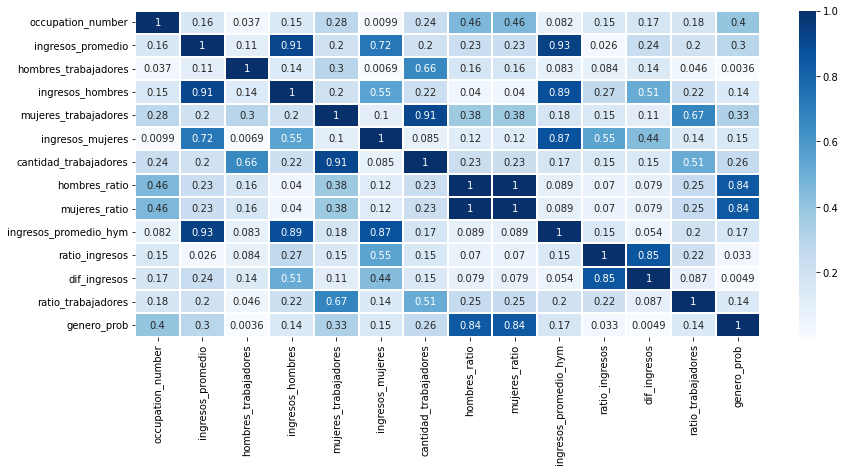

In [60]:
plt.figure(figsize=(14,6))
corr = abs(df_model.corr())
sns.heatmap(corr, annot=True, linewidth=1, cmap='Blues')

## **K-means Clustering**

Aplicaré este modelo para segmentar en clusters los ingresos de los hombres y mujeres y ver cuántas personas caen en cada cluster. 


In [61]:
males_clustering = df_model[['occupation_number','ingresos_hombres']]

Comienzo aplicando la "regla del codo" para ver si hay un número óptimo de clusters. Mediante este método heurístico el número óptimo se determina cuando la curva decreciente "Inercia" vs "Número de clusters" deja de descender tan bruscamente.

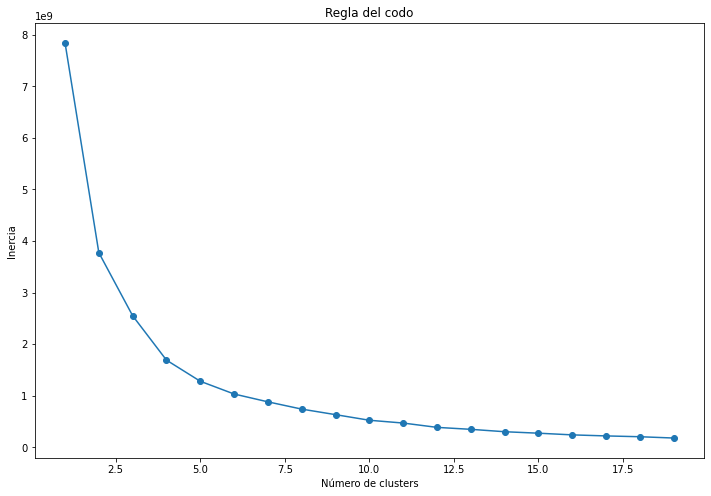

In [62]:
from sklearn.cluster import KMeans

inercia = []

for i in range(1,20):
  kmeans = KMeans(init="k-means++", n_clusters=i, n_init=5,random_state=0)
  kmeans.fit(males_clustering)
  inercia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1,20),inercia, marker="o")
plt.title('Regla del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

Vemos que el quiebre de la curva se presenta en 4. Entonces procedo ahora a aplicar kmeans para 4 clusters y observar cómo se forman.

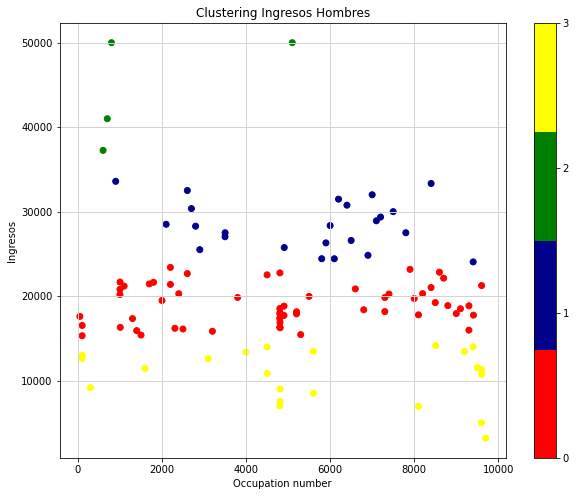

In [63]:
from matplotlib.colors import ListedColormap

kmeans = KMeans(init="k-means++", n_clusters=4, n_init=5, random_state=0)
kmeans.fit(males_clustering)

plt.figure(figsize=(10, 8))

cmap_scatter = ListedColormap(['red', 'darkblue', 'green', 'yellow'])

plt.scatter(np.array(males_clustering.occupation_number),np.array(males_clustering.ingresos_hombres), c=kmeans.labels_, cmap=cmap_scatter)
plt.colorbar(ticks=[0, 1, 2, 3])
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.title('Clustering Ingresos Hombres')
plt.xlabel('Occupation number')
plt.ylabel('Ingresos')
plt.show()

Observamos que tenemos 3 clusters bien definidos y separados por una línea salarial, y un 4to cluster con 4 puntos que representa la clase salarial más alta. Observemos lo mismo para el caso de las mujeres

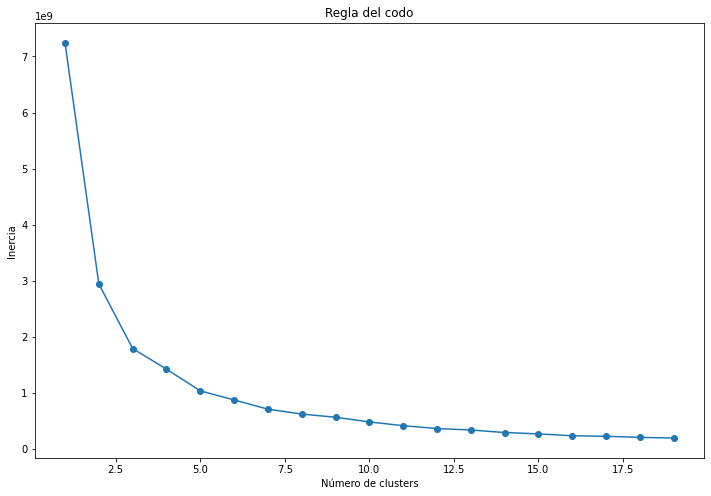

In [64]:
females_clustering = df_model[['occupation_number','ingresos_mujeres']]

inercia = []

for i in range(1,20):
  kmeans = KMeans(init="k-means++", n_clusters=i, n_init=5,random_state=0)
  kmeans.fit(females_clustering)
  inercia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1,20),inercia, marker="o")
plt.title('Regla del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

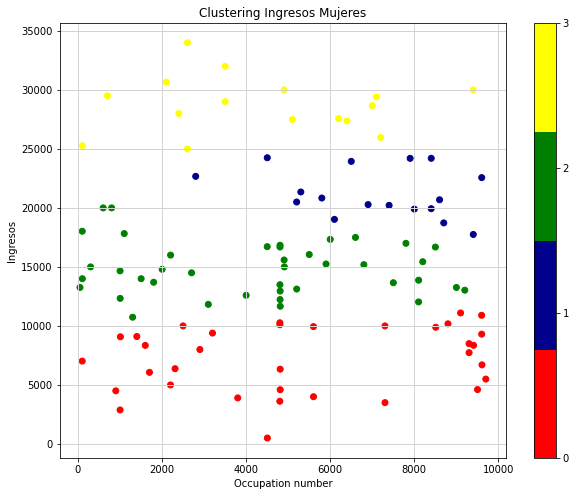

In [65]:
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=5, random_state=0)
kmeans.fit(females_clustering)

plt.figure(figsize=(10, 8))

cmap_scatter = ListedColormap(['red', 'darkblue', 'green', 'yellow'])

plt.scatter(np.array(females_clustering.occupation_number),np.array(females_clustering.ingresos_mujeres), c=kmeans.labels_, cmap=cmap_scatter)
plt.colorbar(ticks=[0, 1, 2, 3])
plt.grid(color='lightgray', linestyle='-', linewidth=1)
plt.title('Clustering Ingresos Mujeres')
plt.xlabel('Occupation number')
plt.ylabel('Ingresos')
plt.show()

En este caso tenemos clusters más parejos y las divisiones entre clusters se producen para salarios más chicos que en el caso de los hombres, lo que da un indicio de la disparidad de ingresos.

## **Knn Classification**

A continuación voy a utilizar los atributos 'mujeres_ratio' (cantidad de mujeres en un trabajo sobre la cantidad total de trabajadores) y 'dif_ingresos' (ingresos promedio de los hombres - mujeres) para clasificar la probabilidad de contratar a hombres o mujeres. Podría utilizar 'ratio_ingresos' pero lo utilicé para calcular 'genero_prob' que va a ser mi atributo target, por lo tanto sería redundante.

In [66]:
df_class = df_model[['mujeres_ratio','dif_ingresos','genero_prob']]
df_class.describe()

,mujeres_ratio,dif_ingresos,genero_prob
count,107.000000,107.000000,107.000000
mean,0.491661,4823.785477,0.485981
std,0.249596,7496.112639,0.502155
min,0.022222,-16000.000000,0.000000
25%,0.266667,1289.204545,0.000000
50%,0.500000,4583.333333,0.000000
75%,0.666667,7486.029412,1.000000
max,0.997531,30000.000000,1.000000


Procedo a estandarizar los datos dado que están a escalas diferentes.

In [67]:
y = np.array(df_class['genero_prob'])

x = np.array(df_class.drop(columns='genero_prob'))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)
x = scaler.transform(x)

x.shape, y.shape

((107, 2), (107,))

In [68]:
# Separo entre train y validation data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=0)
x_train.shape, y_train.shape

((85, 2), (85,))

In [69]:
# Entreno el clasificador
from sklearn import neighbors

k_vecinos = 10  # Número de vecino a considerar (Elijo sqrt(N))

knn = neighbors.KNeighborsClassifier(n_neighbors=k_vecinos) #Por ahora utilizo estos valores. Luego puedo hacer un grid search.
knn.fit(x_train,y_train)

# Calculo las predicciones con los datos que guardé para validar
y_pred = knn.predict(x_test)

In [70]:
# Calculo los parámetros de evaluación
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
f_measure = metrics.f1_score(y_test, y_pred)

print('Accuracy = ', round(accuracy,3),'Precision = ', round(precision,3),'F_measure = ', round(f_measure,3))

Accuracy =  0.955 Precision =  0.923 F_measure =  0.96


Los parámetros de evaluación que obtengo son bastante satisfactorios. Observemos la matriz de confusión.

Confusion matrix:
[[ 9  1]
 [ 0 12]]


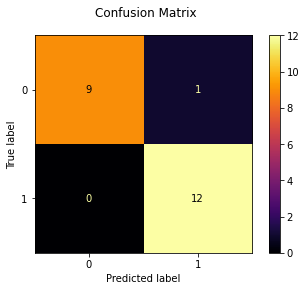

In [71]:
disp = metrics.plot_confusion_matrix(knn, x_test, y_test, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Se ve claramente la alta precisión y exactitud del modelo. Hay un sólo dato falso, en este caso un falso positivo.

Este clasificador puede servir para alentar a un equilibrio entre hombres y mujeres en un mismo trabajo. En función de la cantidad de mujeres sobre el total de trabajadores y la diferencia de salario que presenten respecto de los hombres, el clasificador me dice si debería contratar una mujer o un hombre.

Si el clasificador me indica que contrate un hombre, esto puede deberse a que se trata de un trabajo con mayoría de hombres y sueldos más altos. Entonces uno podría hacer caso omiso y contratar una mujer para compensar el desequilibrio. Incluso se podría construir el clasificador inverso cuya ayuda sea directa y uno no tenga que deducirla, simplemente invirtiendo las clases en el dataset.

## **Regresión Lineal**

A continuación voy a realizar un modelo simple de regresión lineal que me intente predecir el salario de los hombres y mujeres en función del salario promedio total, y en función de los coeficientes que obtenga distinguir el gap salarial.

In [72]:
df_reg = df_model[['ingresos_hombres','ingresos_mujeres','ingresos_promedio']]
df_reg.describe()

,ingresos_hombres,ingresos_mujeres,ingresos_promedio
count,107.000000,107.000000,107.000000
mean,20338.850642,15515.065165,18462.329482
std,8076.220778,7717.611289,7034.795951
min,3200.000000,500.000000,3876.923077
25%,15944.362745,9971.061644,13656.854249
50%,19231.134831,14666.666667,17571.428571
75%,24236.538462,20250.591216,22280.833333
max,50000.000000,34000.000000,36428.571429


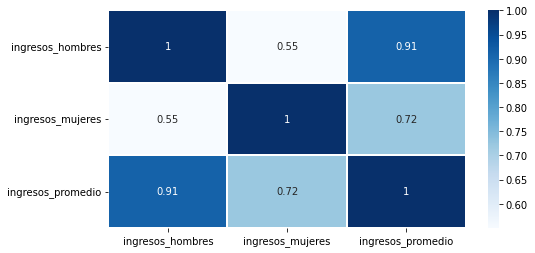

In [73]:
plt.figure(figsize=(8,4))
corr = abs(df_reg.corr())
sns.heatmap(corr, annot=True, linewidth=1, cmap='Blues')

In [74]:
y = np.array(df_reg['ingresos_hombres'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x=np.array(df_reg['ingresos_promedio']).reshape(-1,1)

scaler.fit(x)
x = scaler.transform(x)

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Pendiente:  : 6857.206714670658
R^2 train : 0.8355004083972343
R^2 test : 0.8138853819710286
La precisión del modelo es:  81.39 %


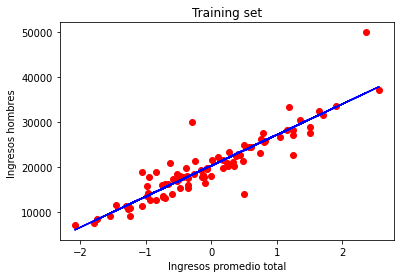

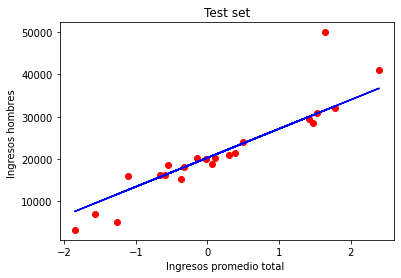

In [76]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
linear_train_score = linear_regressor.score(x_train,y_train)

y_pred=linear_regressor.predict(x_test)

print('Pendiente:  :', linear_regressor.coef_[0])
#print('Model intercept :', linear_regressor.intercept_)
#print('Regression Line . :',linear_regressor.coef_[0],'* x + ',linear_regressor.intercept_ )
print('R^2 train :',linear_regressor.score(x_train,y_train))
print('R^2 test :',linear_regressor.score(x_test,y_test))
#print(linear_regressor.coef_)

accuracy=linear_regressor.score(x_test,y_test)
print('La precisión del modelo es: ',round(accuracy*100,2),'%')

plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, linear_regressor.predict(x_train), color='blue')
plt.title('Training set')
plt.ylabel('Ingresos hombres ')
plt.xlabel('Ingresos promedio total')
plt.show()

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, linear_regressor.predict(x_test), color='blue')
plt.title('Test set')
plt.ylabel('Ingresos hombres ')
plt.xlabel('Ingresos promedio total ')
plt.show()

Pendiente:  : 5470.835253748136
R^2 train : 0.4754973178389593
R^2 test : 0.6416315050801094
La precisión del modelo es:  64.16 %


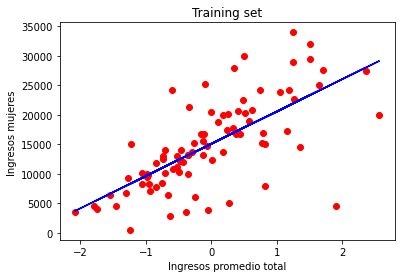

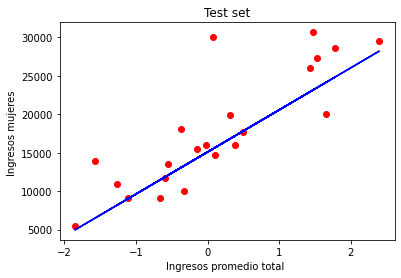

In [77]:
y = np.array(df_reg['ingresos_mujeres'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

linear_regressor.fit(x_train, y_train)
linear_train_score = linear_regressor.score(x_train,y_train)

y_pred=linear_regressor.predict(x_test)

print('Pendiente:  :', linear_regressor.coef_[0])
#print('Model intercept :', linear_regressor.intercept_)
#print('Regression Line . :',linear_regressor.coef_[0],'* x + ',linear_regressor.intercept_ )
print('R^2 train :',linear_regressor.score(x_train,y_train))
print('R^2 test :',linear_regressor.score(x_test,y_test))
#print(linear_regressor.coef_)

accuracy=linear_regressor.score(x_test,y_test)
print('La precisión del modelo es: ',round(accuracy*100,2),'%')

plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, linear_regressor.predict(x_train), color='blue')
plt.title('Training set')
plt.ylabel('Ingresos mujeres ')
plt.xlabel('Ingresos promedio total')
plt.show()

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, linear_regressor.predict(x_test), color='blue')
plt.title('Test set')
plt.ylabel('Ingresos mujeres ')
plt.xlabel('Ingresos promedio total ')
plt.show()

Observamos que el modelo de regresión lineal arroja una mejor precisión en el caso de los ingresos de los hombres (81% vs 64%). Esto puede deberse a que los ingresos de las mujeres presentan una mayor dispersión de los datos.

Además la pendiente para el caso de los hombres es de 6857 y la de las mujeres es de 5470. Esto indica algo que habíamos observado antes: los salarios de los hombres son mayores que los de las mujeres cuanto más alto sea el salario promedio.

Este regresor también puede ayudar a reducir la brecha salarial, ya que nos predice cuánto debería ganar una mujer o un hombre dependiendo del sueldo promedio en el trabajo correspondiente. En base al número que arroje el regresor, para el caso que se quiera contratar una mujer, uno podría aumentarlo para reducir el gap salarial con los hombres.

## **Conclusiones**

En función de la ultima Encuesta Nacional a trabajadores sobre Condiciones de Empleo, Trabajo, Salud y Seguridad (ECETSS 2018), estudiamos la diferencia salarial entre hombres y mujeres en el ámbito laboral.

En primer lugar, mostramos un sesgo hacia la derecha de los salarios masculinos respecto de los femeninos indicando una diferencia salarial real, más allá del sector en el que se desempeñen.

En segundo lugar, analizamos la diferencia salarial por sector, encontrando que en "Trabajo Doméstico" las mujeres superan ampliamente el salario de los hombres. Sin embargo, este es el único sector laboral donde ocurre (según el clasificador del CAES). En el resto de sectores el salario es menor ganando casi apenas más de la mitad en la industria manufacturera, por ejemplo.

Luego, pudimos observar ocupación por ocupación, distinguiendo en cuáles la diferencia salarial es más amplia y en cuáles es favorable a las mujeres. Observando las ocupaciones mejor y peor pagas, se pudo ver que las mujeres tienden a ganar menos que los hombres en las mejor pagas y más en las peor pagas. 

Además, vimos que a medida que aumenta el sueldo promedio de los trabajadores, la diferencia salarial entre hombres y mujeres es más grande.

Por último, a través de modelos simples de clasificación y regresión lineal se presentaron algunas ideas para reducir esta brecha salarial.